In [100]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np
from bokeh.io import output_notebook, show, save

from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
got_df = pd.read_csv('stormofswords.csv')
got_df

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
...,...,...,...
347,Walder,Petyr,6
348,Walder,Roslin,6
349,Walton,Jaime,10
350,Ygritte,Qhorin,7


In [4]:
G = networkx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight')

In [15]:
G = networkx.from_pandas_edgelist(df_to_graph, 'node1', 'node2', 'combined_score')
edge_width = dict([((a, b), G.get_edge_data(a,b)['combined_score']*5) for a, b in G.edges()])
networkx.set_edge_attributes(G, name ="edge_width", values =edge_width)

In [114]:
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8, PiYG
from bokeh.transform import linear_cmap

In [87]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [88]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [92]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Game of Thrones Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, line_color="red", fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))
#network_graph.node_renderer.glyph = Circle(size=15, line_color="red", fill_color='skyblue')
#Set edge opacity and width

network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width="edge_width")

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [13]:
# Cluster dataset
cl_df = pd.read_csv("string_MCL_clusters.tsv", sep="\t")
cl_df.sample(5)

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
114,MCL,22,Aquamarine 3,3,gip,99287.STM0518,Similar to E. coli glyoxylate-induced protein ...
10,MCL,1,Red,11,spaO,99287.STM2891,Surface presentation of antigens protein SpaO;...
104,MCL,19,Medium Aqua Marine,3,mtlA,99287.STM3685,"Similar to E. coli PTS system, mannitol-specif..."
169,MCL,46,Medium Purple 2,2,katG,99287.STM4106,Catalase-peroxidase; Bifunctional enzyme with ...
105,MCL,19,Medium Aqua Marine,3,ptsA,99287.STM4110,General PTS family enzyme I; Similar to E. col...


In [225]:
full_df = pd.read_table("string_interactions_short.tsv")
full_df = full_df.rename(columns={'#node1': 'node1'})
full_df.sample(5)
df_to_graph = full_df[["node1", "node2", "combined_score"]]
cluster=cl_df[['protein name', 'cluster number']].set_index('protein name').to_dict()['cluster number']
results_full = pd.read_csv("../../results/26-07-final-results.csv", index_col=0)
results = results_full[results_full.day == 'd1']
results = results.groupby('gene').CI.median().reset_index()

genes_in_graph = set(list(df_to_graph.node1.unique())+ list(df_to_graph.node2.unique())).intersection(results.gene)

In [101]:
df_to_graph = df_to_graph[(df_to_graph.node1.isin(genes_in_graph)) & (df_to_graph.node2.isin(genes_in_graph))]

In [102]:
ci = results[results.gene.isin(genes_in_graph)].set_index('gene').to_dict()['CI']


In [109]:
G = networkx.from_pandas_edgelist(dtg, 'node1', 'node2', 'combined_score')
edge_width = dict([((a, b), G.get_edge_data(a,b)['combined_score']*5) for a, b in G.edges()])
networkx.set_edge_attributes(G, name ="edge_width", values =edge_width)

In [110]:
adjusted_node_size = ci
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [118]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8

#Choose a title!
title = 'Testing'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Gene", "@index"),
        
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=10, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width

network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width="edge_width")

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [126]:
c1 = list(cl_df[cl_df['cluster number'] == 1]["protein name"].values)
dtg = full_df[(full_df.node1.isin(c1)) | (full_df.node2.isin(c1))][['node1', 'node2', 'combined_score']]
genes_in_graph = set(list(dtg.node1.unique())+ list(dtg.node2.unique())).intersection(results.gene)
dtg = dtg[(dtg.node1.isin(genes_in_graph)) & (dtg.node2.isin(genes_in_graph))]
ci = results[results.gene.isin(genes_in_graph)].set_index('gene').to_dict()['CI']
G = networkx.from_pandas_edgelist(dtg, 'node1', 'node2', 'combined_score')
edge_width = dict([((a, b), G.get_edge_data(a,b)['combined_score']*5) for a, b in G.edges()])
networkx.set_edge_attributes(G, name ="edge_width", values =edge_width)
adjusted_node_size = ci
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [145]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8

#Choose a title!
title = 'Testing'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Gene", "@index"),
        
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = 0.0002 #min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = 13#max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=15, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width

network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width="edge_width")

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [144]:
results.CI.max()

12.402006570487536

In [211]:
c1 = list(cl_df[cl_df['cluster number'] == 1]["protein name"].values)
dtg = full_df[(full_df.node1.isin(c1)) | (full_df.node2.isin(c1))][['node1', 'node2', 'combined_score']]
genes_in_graph = set(list(dtg.node1.unique())+ list(dtg.node2.unique())).intersection(results.gene)
dtg = dtg[(dtg.node1.isin(genes_in_graph)) & (dtg.node2.isin(genes_in_graph))]
ci = results[results.gene.isin(genes_in_graph)].set_index('gene').to_dict()['CI']
G = networkx.from_pandas_edgelist(dtg, 'node1', 'node2', 'combined_score')
edge_width = dict([((a, b), G.get_edge_data(a,b)['combined_score']*5) for a, b in G.edges()])
networkx.set_edge_attributes(G, name ="edge_width", values =edge_width)
adjusted_node_size = ci
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [216]:
ci

{'avrA': 1.1194232995463116,
 'bcfA': 1.1356951702763005,
 'bigA': 1.1954712340339058,
 'fimH': 1.4800162289005363,
 'invA': 1.243630480440877,
 'invC': 1.1939163291360726,
 'invE': 1.1740196247420138,
 'invJ': 1.1691314597259477,
 'lpfD': 1.276734656022391,
 'mgtC': 1.3685861669092618,
 'misL': 1.1108739437791044,
 'rmbA': 1.14080680408038,
 'sipC': 1.1107673228335089,
 'sipD': 1.0967532656664427,
 'sopB': 1.0130260567721834,
 'sopD': 1.1578162313426712,
 'spaO': 1.059949365322066,
 'ssaU': 0.8817998383318431,
 'torD': 1.1830361666986875,
 'virK': 1.1538732739010606}

In [217]:
networkx.get_node_attributes(G, 'adjusted_node_size').values()

dict_values([1.1194232995463116, 1.4800162289005363, 1.0130260567721834, 1.0967532656664427, 1.1107673228335089, 1.243630480440877, 1.1108739437791044, 1.3685861669092618, 1.1356951702763005, 1.059949365322066, 1.1954712340339058, 0.8817998383318431, 1.1691314597259477, 1.1939163291360726, 1.1740196247420138, 1.1578162313426712, 1.14080680408038, 1.276734656022391, 1.1538732739010606, 1.1830361666986875])

In [213]:
pos = nx.kamada_kawai_layout(G)
ew = list(nx.get_node_attributes(G, 'adjusted_node_size').values())
ncolor = list(networkx.get_node_attributes(G, 'adjusted_node_size').values())

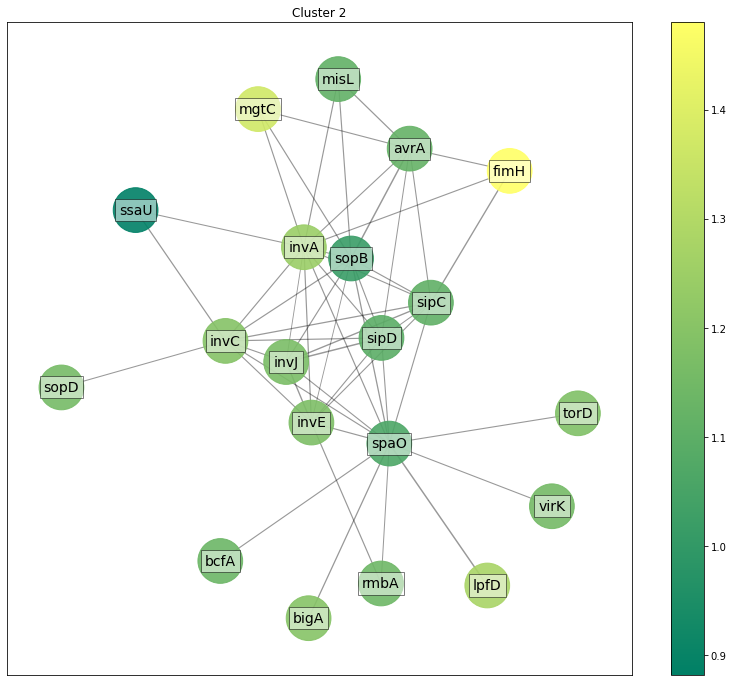

In [224]:
cmap = plt.cm.summer
fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(G, pos, alpha=0.4, width=ew, )
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=ncolor, vmin=min(ncolor),
                       vmax=max(ncolor), cmap=cmap, alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.5}
nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options);
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=min(ncolor), vmax=max(ncolor)) )
plt.colorbar(sm);
plt.title('Cluster 2');

In [154]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

In [222]:
cl_df

,gene,CI
0,AAAAAAACCTACGAAAC,1.353032
1,AAAAACAAACGCTAAGC,0.960210
2,AAAAACACGCTTTTAAA,0.791605
3,AAAAACATGCCACACTG,1.117609
4,AAAAAGACGATGCGCAC,0.924368
...,...,...
5895,zntA,1.194173
5896,zntB,0.718872
5897,zntR,1.266478
5898,zraP,0.985666


In [227]:
r = results_full[results_full.day == "d1"]

In [231]:
r[r.gene == 'spaO']

,gene,day,log2FC,lfcSE,lfc_pvalue,lfc_padj,z-score,CI,zscore_pval,zscore_padj,library
803,spaO,d1,0.075042,0.163480,0.646212,0.982528,2.465426,1.464754,0.013685,0.044301,library_11_1
3019,spaO,d1,0.054274,0.623302,0.930612,0.983878,0.083956,1.042489,0.933092,0.994979,library_15_1
842,spaO,d1,0.398760,0.266712,0.134889,0.999001,1.709513,1.478126,0.087356,0.976876,library_13_2
2235,spaO,d1,-0.034693,0.290080,0.904801,0.983367,1.159163,1.292189,0.246390,0.481846,library_10_1
915,spaO,d1,0.186474,0.504189,0.711495,0.999154,0.146171,1.059949,0.883787,0.999535,library_12_2
4150,spaO,d1,0.013348,0.267447,0.960195,0.999108,0.219554,1.044506,0.826219,0.997845,library_14_2
945,spaO,d1,0.022970,0.271532,0.932583,0.995191,0.023992,1.005043,0.980859,0.999790,library_10_2


In [233]:
#Look at cluster sizes
cl_df.columns = [c.replace(" ", "_") for c in cl_df.columns]

In [234]:
cl_df.head()

,#clustering_method,cluster_number,cluster_color,gene_count,protein_name,protein_identifier,protein_description
0,MCL,1,Red,11,STM0559,99287.STM0559,Bactoprenol-linked glucose translocase; Involv...
1,MCL,1,Red,11,avrA,99287.STM2865,Putative inner membrane protein
2,MCL,1,Red,11,invA,99287.STM2896,Invasion protein InvA; Involved in the invasio...
3,MCL,1,Red,11,invC,99287.STM2894,Probable ATP synthase SpaL; Necessary for effi...
4,MCL,1,Red,11,invE,99287.STM2897,Invasion protein InvE; Involved in the trigger...


In [238]:
cl_size = cl_df.groupby("cluster_number").protein_name.nunique().reset_index()
cl_size[cl_size.protein_name > 4]
# Want to look at clusters 1 through 9 



In [304]:
# Colors
vmin= -3.5
vmax=0.5
cmap = plt.cm.coolwarm
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0., vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=divnorm)

In [300]:
def get_graph_for_cluster(results_df, cluster_df, interaction_df, day='d1', cluster=1):
    results = results_df[results_df.day == day].copy()
    results['logCI'] = np.log10(results['CI'])
    cl_genes = list(cluster_df[cluster_df['cluster_number'] == cluster]["protein_name"].values)
    dtg = interaction_df[(interaction_df.node1.isin(cl_genes)) | (interaction_df.node2.isin(cl_genes))][['node1', 'node2', 'combined_score']]
    genes_in_graph = set(list(dtg.node1.unique())+ list(dtg.node2.unique())).intersection(results.gene)
    dtg = dtg[(dtg.node1.isin(genes_in_graph)) & (dtg.node2.isin(genes_in_graph))]
    ci = results[results.gene.isin(genes_in_graph)].set_index('gene').to_dict()['logCI']
    G = networkx.from_pandas_edgelist(dtg, 'node1', 'node2', 'combined_score')
    edge_width = dict([((a, b), G.get_edge_data(a,b)['combined_score']*5) for a, b in G.edges()])
    networkx.set_edge_attributes(G, name ="edge_width", values =edge_width)
    networkx.set_node_attributes(G, name='ci', values=ci)
    return G

In [306]:
def plot_cluster(graph, ax, sm):
    pos = nx.kamada_kawai_layout(graph)
    edge_width = list(nx.get_edge_attributes(graph, 'edge_width').values())
    ncolor = list(networkx.get_node_attributes(graph, 'ci').values())
    ncolor = [sm.to_rgba(x) for x in ncolor]
    nx.draw_networkx_edges(graph, pos, alpha=0.8, width=edge_width, ax=ax )
    nx.draw_networkx_nodes(graph, pos, node_size=2000, node_color=ncolor,  
                         alpha=0.9, ax=ax)
    label_options = {"ec": "k", "fc": "white", "alpha": 0.5}
    nx.draw_networkx_labels(graph, pos, font_size=14, bbox=label_options, ax=ax);


In [307]:
# Make a graph
G = get_graph_for_cluster(results_full, cl_df, full_df, day='d1', cluster=1)


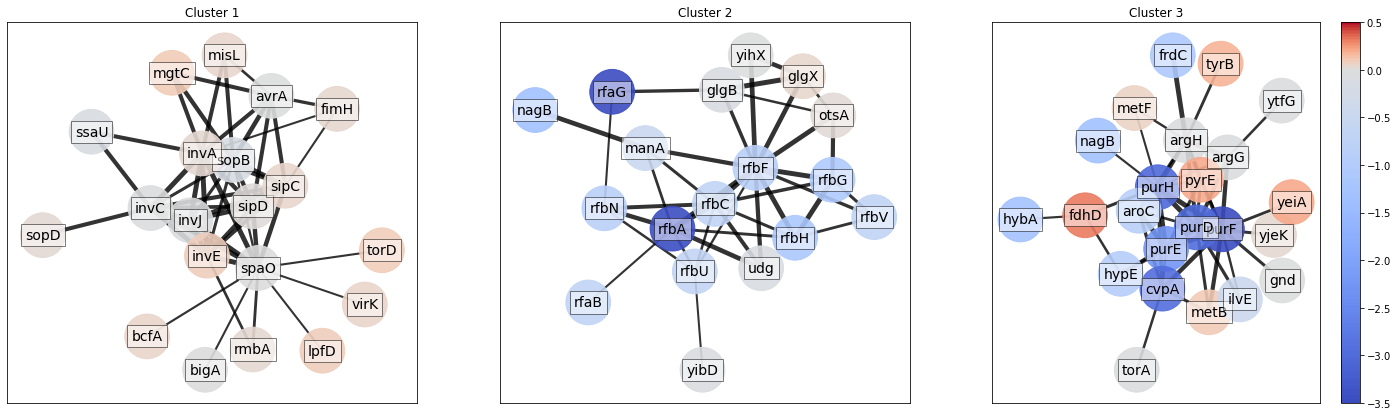

In [325]:

fig, axs = plt.subplots(1,3, figsize=(25,7))
for i, ax in enumerate(axs):
    G = get_graph_for_cluster(results_full, cl_df, full_df, day='d1', cluster=i+1)
    plot_cluster(G, ax, sm)
    ax.set_title(f'Cluster {i+1}')
# nx.draw_networkx_edges(G, pos, alpha=0.8, width=ew, ax=ax )
# nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=tcolor,  
#                          alpha=0.9)
# label_options = {"ec": "k", "fc": "white", "alpha": 0.5}
# nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options);

plt.colorbar(sm);
#plt.title('Cluster ');

In [282]:
ci

{'glgB': -0.11260940585400546,
 'otsA': 0.017959929969321758,
 'rfaB': -0.6851363630586774,
 'rfaG': -3.6326327985612012,
 'rfbH': -1.1404267782533886,
 'rfbV': -0.7053191467352593,
 'udg': -0.10144739741923263,
 'yibD': -0.06037338727982847,
 'yihX': -0.020869829538343525,
 'rfbF': -0.8371705602726195,
 'rfbG': -1.0536223032227128,
 'rfbN': -0.8214535349177347,
 'rfbU': -0.635431059676863,
 'rfbA': -3.4635591636953698,
 'glgX': 0.03989467585650409,
 'rfbC': -0.6925439316711601,
 'nagB': -1.3232245757931316,
 'manA': -0.4814924153214954}